In [3]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
#import os
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
import matplotlib.patches as patches
import os
import cartopy.mpl.ticker as cticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import re
import datetime
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.colors as mcolors
import datetime
from matplotlib.colors import ListedColormap
from matplotlib.colors import TwoSlopeNorm


In [2]:
clim_z500 = xr.open_dataset('/home/kit/imk-tro/gj5173/tmp/clim_Z50000_30day_centered_on_0629_1979-2020_-180.0--60.0degE_25.0-80.0degN_by_grid_point',engine = 'netcdf4')

In [3]:
#ERA5 anomaly over the whole north America

#ERA5
ds_era = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Knippertz/ey9908/tmp_Yangfan/data/era5/2021.h5')
ds_era_z500 = ds_era.fields[716,14,260:40:-1,720:1200]

In [4]:
#interpolate from (220,480) to (110,240) 
original_data = ds_era_z500

# Define the original grid points along the last two dimensions
x_orig = np.arange(220)
y_orig = np.arange(480)

# Define the new grid points along the last two dimensions
y_new = np.linspace(0, 480 - 1, 240)  
x_new = np.linspace(0, 220 - 1, 110)


ds_era_z500_interpolated = original_data.interp(coords={'phony_dim_2': x_new, 'phony_dim_3': y_new}, method='linear')

In [5]:
#use smaller batches to calculate the difference(cuz direct calculation is not possible)
variable1 = ds_era_z500_interpolated.values
variable2 = clim_z500.Z[:,:].values


batch_size = 50  # Set the desired batch size

# Process data in smaller batches using a loop

anomaly_era5 = np.empty((110, 240))
for i in range(0, 110, batch_size):
    for j in range(0, 240, batch_size):
        batch_variable1 = variable1[i:i + batch_size, j:j + batch_size]
        batch_variable2 = variable2[i:i + batch_size, j:j + batch_size]
        
        # Calculate the difference point by point for the current batch
        batch_difference = batch_variable1 - batch_variable2
        
        # Update the difference array with the current batch_difference
        anomaly_era5[i:i + batch_size, j:j + batch_size] = batch_difference

In [6]:
ds_ec_1 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Knippertz/ey9908/tmp_Yangfan/data/fourcastnet/with_ecmwf_ic/20210615_00_backtransformed.nc') 
variable_data_ec_1 = ds_ec_1['forecast'][:,56,14,:,:]




ds_ec_2 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Knippertz/ey9908/tmp_Yangfan/data/fourcastnet/with_ecmwf_ic/20210616_00_backtransformed.nc') 
variable_data_ec_2 = ds_ec_2['forecast'][:,52,14,:,:]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_ec_3 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Knippertz/ey9908/tmp_Yangfan/data/fourcastnet/with_ecmwf_ic/20210617_00_backtransformed.nc') 
variable_data_ec_3 = ds_ec_3['forecast'][:,48,14,:,:]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_ec_4 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Knippertz/ey9908/tmp_Yangfan/data/fourcastnet/with_ecmwf_ic/20210618_00_backtransformed.nc') 
variable_data_ec_4 = ds_ec_4['forecast'][:,44,14,:,:]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_ec_5 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Knippertz/ey9908/tmp_Yangfan/data/fourcastnet/with_ecmwf_ic/20210619_00_backtransformed.nc') 
variable_data_ec_5 = ds_ec_5['forecast'][:,40,14,:,:]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_ec_6 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Knippertz/ey9908/tmp_Yangfan/data/fourcastnet/with_ecmwf_ic/20210620_00_backtransformed.nc') 
variable_data_ec_6 = ds_ec_6['forecast'][:,36,14,:,:]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_ec_7 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Knippertz/ey9908/tmp_Yangfan/data/fourcastnet/with_ecmwf_ic/20210621_00_backtransformed.nc') 
variable_data_ec_7 = ds_ec_7['forecast'][:,32,14,:,:]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_ec_8 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Knippertz/ey9908/tmp_Yangfan/data/fourcastnet/with_ecmwf_ic/20210622_00_backtransformed.nc') 
variable_data_ec_8 = ds_ec_8['forecast'][:,28,14,:,:]

ds_ec_9 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Knippertz/ey9908/tmp_Yangfan/data/fourcastnet/with_ecmwf_ic/20210623_00_backtransformed.nc') 
variable_data_ec_9 = ds_ec_9['forecast'][:,24,14,:,:]

ds_ec_10 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Knippertz/ey9908/tmp_Yangfan/data/fourcastnet/with_ecmwf_ic/20210624_00_backtransformed.nc') 
variable_data_ec_10 = ds_ec_10['forecast'][:,20,14,:,:]

ds_ec_11 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Knippertz/ey9908/tmp_Yangfan/data/fourcastnet/with_ecmwf_ic/20210625_00_backtransformed.nc') 
variable_data_ec_11 = ds_ec_11['forecast'][:,16,14,:,:]

ds_ec_12 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Knippertz/ey9908/tmp_Yangfan/data/fourcastnet/with_ecmwf_ic/20210626_00_backtransformed.nc') 
variable_data_ec_12 = ds_ec_12['forecast'][:,12,14,:,:]

ds_ec_13 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Knippertz/ey9908/tmp_Yangfan/data/fourcastnet/with_ecmwf_ic/20210627_00_backtransformed.nc') 
variable_data_ec_13 = ds_ec_13['forecast'][:,8,14,:,:]
ds_ec_14 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Knippertz/ey9908/tmp_Yangfan/data/fourcastnet/with_ecmwf_ic/20210628_00_backtransformed.nc') 
variable_data_ec_14 = ds_ec_14['forecast'][:,4,14,:,:]
ds_ec_15 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Knippertz/ey9908/tmp_Yangfan/data/fourcastnet/with_ecmwf_ic/20210629_00_backtransformed.nc') 
variable_data_ec_15 = ds_ec_15['forecast'][:,0,14,:,:]

In [7]:
new_dimension = 'time'
ds_ec_1_expanded = variable_data_ec_1.expand_dims(**{new_dimension: [0]})
ds_ec_2_expanded = variable_data_ec_2.expand_dims(**{new_dimension: [1]})
ds_ec_3_expanded = variable_data_ec_3.expand_dims(**{new_dimension: [2]})
ds_ec_4_expanded = variable_data_ec_4.expand_dims(**{new_dimension: [3]})
ds_ec_5_expanded = variable_data_ec_5.expand_dims(**{new_dimension: [4]})
ds_ec_6_expanded = variable_data_ec_6.expand_dims(**{new_dimension: [5]})
ds_ec_7_expanded = variable_data_ec_7.expand_dims(**{new_dimension: [6]})
ds_ec_8_expanded = variable_data_ec_8.expand_dims(**{new_dimension: [7]})
ds_ec_9_expanded = variable_data_ec_9.expand_dims(**{new_dimension: [8]})
ds_ec_10_expanded = variable_data_ec_10.expand_dims(**{new_dimension:[9]})
ds_ec_11_expanded = variable_data_ec_11.expand_dims(**{new_dimension: [10]})
ds_ec_12_expanded = variable_data_ec_12.expand_dims(**{new_dimension: [11]})
ds_ec_13_expanded = variable_data_ec_13.expand_dims(**{new_dimension: [12]})
ds_ec_14_expanded = variable_data_ec_14.expand_dims(**{new_dimension: [13]})
ds_ec_15_expanded = variable_data_ec_15.expand_dims(**{new_dimension: [14]})

In [8]:
ds_fc_ec_z500 = xr.concat([ds_ec_1_expanded,ds_ec_2_expanded,ds_ec_3_expanded,ds_ec_4_expanded,ds_ec_5_expanded,ds_ec_6_expanded,ds_ec_7_expanded,ds_ec_8_expanded,ds_ec_9_expanded,ds_ec_10_expanded,ds_ec_11_expanded,ds_ec_12_expanded,ds_ec_13_expanded,ds_ec_14_expanded,ds_ec_15_expanded],dim=new_dimension)

/home/kit/imk-tro/gj5173/anaconda3/envs/newenvi1/lib/python3.9/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


In [9]:
original_data = ds_fc_ec_z500[:,:,:,:]

In [10]:
ds_fc_ec_z500_interpolated = np.zeros((15, 51,110,240),dtype=float)

In [11]:
for i in range(15):
    for j in range(51):
# Define the original grid points along the last two dimensions
        x_orig = np.linspace(0,219,220)
        y_orig = np.linspace(0,479,480)

# Define the new grid points along the last two dimensions
        
        y_new = np.linspace(0, 480 - 1, 240)  
        x_new = np.linspace(0, 220 - 1, 110)

        ds_fc_ec_z500_interpolated[i,j,:,:] = original_data[i,j,:,:].interp(coords={'phony_dim_4': y_new, 'phony_dim_3': x_new}, method='cubic')

In [62]:
ds_fc_ec_z500_interpolated  = xr.DataArray(ds_fc_ec_z500_interpolated)

In [63]:
#use smaller batches to calculate the difference(cuz direct calculation is not possible)
variable1 = ds_fc_ec_z500_interpolated[:,:,::-1,:].values
variable2 = clim_z500.Z[:,:].values


batch_size = 50  # Set the desired batch size

# Process data in smaller batches using a loop

anomaly_fc_ec = np.empty((15,51,110,240))

for i in range(0, 110, batch_size):
    for j in range(0, 240, batch_size):
        for k in range(15):
            for l in range(51):
                batch_variable1 = variable1[k,l,i:i + batch_size, j:j + batch_size]
                batch_variable2 = variable2[i:i + batch_size, j:j + batch_size]
        
        # Calculate the difference point by point for the current batch
                batch_difference = batch_variable1 - batch_variable2
        
        # Update the difference array with the current batch_difference
                anomaly_fc_ec[k,l,i:i + batch_size, j:j + batch_size] = batch_difference

In [12]:
#store the anomaly variable of fcn_era
%store -r anomaly_fc_era_t850
%store -r anomaly_era5_t850
%store -r anomaly_fc_ec_t850

In [ ]:
anomaly_fc_era_t850_cf = anomaly_fc_era_t850[:,0,:,:]
anomaly_fc_ec_t850_cf = anomaly_fc_ec_t850[:,0,:,:]

anomaly_fc_era_t850_pf = anomaly_fc_era_t850[:,1:51,:,:]
anomaly_fc_ec_t850_pf = anomaly_fc_ec_t850[:,0:50,:,:]


In [330]:
%store -r anomaly_era5_z500_na_0629_interpolated
%store -r anomaly_ec_z500_na_0629_ens_interpolated
%store -r anomaly_fcnv1_era_z500_na_0629_ens_interpolated

In [411]:
anomaly_fcnv1_era_z500_na_0629_ens_interpolated = anomaly_ec_z500_na_0629_ens_interpolated

In [412]:
from numpy import zeros, newaxis
rmse_per_member_7= np.zeros((50),dtype=object)
#era5_06_29 = era5_06_29[newaxis,newaxis,:,:]

# Iterate through each member in the 4D array
for j in range(50):
        # Calculate the squared differences for the current member
    rmse_per_member_7[j] = np.sqrt(np.mean((anomaly_fcnv1_era_z500_na_0629_ens_interpolated[7, j, :, :] - anomaly_era5_z500_na_0629_interpolated)**2))

In [413]:
from numpy import zeros, newaxis
rmse_per_member_5 = np.zeros((50),dtype=object)
#era5_06_29 = era5_06_29[newaxis,newaxis,:,:]

# Iterate through each member in the 4D array
for j in range(50):
        # Calculate the squared differences for the current member
    rmse_per_member_5[j] = np.sqrt(np.mean((anomaly_fcnv1_era_z500_na_0629_ens_interpolated[9, j, :, :] - anomaly_era5_z500_na_0629_interpolated)**2))

In [414]:
from numpy import zeros, newaxis
rmse_per_member_3 = np.zeros((50),dtype=object)
#era5_06_29 = era5_06_29[newaxis,newaxis,:,:]

# Iterate through each member in the 4D array
for j in range(50):
        # Calculate the squared differences for the current member
    rmse_per_member_3[j] = np.sqrt(np.mean((anomaly_fcnv1_era_z500_na_0629_ens_interpolated[12, j, :, :] - anomaly_era5_z500_na_0629_interpolated)**2))

In [415]:
#good and bad members index finding
rmse_flattened_7 = rmse_per_member_7.flatten()


rmse_30_7 = np.percentile(rmse_flattened_7,30)
rmse_70_7 = np.percentile(rmse_flattened_7,70)


below_30th_percentile_7 = rmse_per_member_7 < rmse_30_7
above_70th_percentile_7 = rmse_per_member_7 > rmse_70_7

good_forecast_index_7 = np.where(rmse_per_member_7 < rmse_30_7)
bad_forecast_index_7 = np.where(rmse_per_member_7 > rmse_70_7)


In [416]:
#good and bad members index finding
rmse_flattened_5 = rmse_per_member_5.flatten()


rmse_30_5 = np.percentile(rmse_flattened_5,30)
rmse_70_5 = np.percentile(rmse_flattened_5,70)


below_30th_percentile_5 = rmse_per_member_5 < rmse_30_5
above_70th_percentile_5 = rmse_per_member_5 > rmse_70_5

good_forecast_index_5 = np.where(rmse_per_member_5 < rmse_30_5)
bad_forecast_index_5 = np.where(rmse_per_member_5 > rmse_70_5)

In [417]:
#good and bad members index finding
rmse_flattened_3 = rmse_per_member_3.flatten()


rmse_30_3 = np.percentile(rmse_flattened_3,30)
rmse_70_3 = np.percentile(rmse_flattened_3,70)


below_30th_percentile_3 = rmse_per_member_3 < rmse_30_3
above_70th_percentile_3 = rmse_per_member_3 > rmse_70_3

good_forecast_index_3 = np.where(rmse_per_member_3 < rmse_30_3)
bad_forecast_index_3 = np.where(rmse_per_member_3 > rmse_70_3)

In [418]:
#good and bad members index finding
rmse_flattened_7 = rmse_per_member_7.flatten()


rmse_30_7 = np.percentile(rmse_flattened_7,30)
rmse_70_7 = np.percentile(rmse_flattened_7,70)


below_30th_percentile_7 = rmse_per_member_7 < rmse_30_7
above_70th_percentile_7 = rmse_per_member_7 > rmse_70_7

good_forecast_index_7 = np.where(rmse_per_member_7 < rmse_30_7)
bad_forecast_index_7 = np.where(rmse_per_member_7 > rmse_70_7)

In [419]:
#pick the forecase by index
good_forecast_7 = anomaly_fcnv1_era_z500_na_0629_ens_interpolated[7,good_forecast_index_7[0][:],:,:]
bad_forecast_7 = anomaly_fcnv1_era_z500_na_0629_ens_interpolated[7,bad_forecast_index_7[0][:],:,:]

In [420]:
#pick the forecase by index
good_forecast_5 = anomaly_fcnv1_era_z500_na_0629_ens_interpolated[9,good_forecast_index_5[0][:],:,:]
bad_forecast_5 = anomaly_fcnv1_era_z500_na_0629_ens_interpolated[9,bad_forecast_index_5[0][:],:,:]

In [421]:
#pick the forecase by index
good_forecast_3 = anomaly_fcnv1_era_z500_na_0629_ens_interpolated[7,good_forecast_index_3[0][:],:,:]
bad_forecast_3 = anomaly_fcnv1_era_z500_na_0629_ens_interpolated[7,bad_forecast_index_3[0][:],:,:]

In [422]:
#take the mean of those memebers 
good_forecast_7 = np.mean(good_forecast_7,axis=0)
bad_forecast_7 = np.mean(bad_forecast_7,axis=0)

In [423]:
#take the mean of those memebers 
good_forecast_5 = np.mean(good_forecast_5,axis=0)
bad_forecast_5 = np.mean(bad_forecast_5,axis=0)

In [424]:
#take the mean of those memebers 
good_forecast_3 = np.mean(good_forecast_3,axis=0)
bad_forecast_3 = np.mean(bad_forecast_3,axis=0)

In [425]:
%store good_forecast_3
%store bad_forecast_3
%store good_forecast_5
%store bad_forecast_5
%store good_forecast_7
%store bad_forecast_7

Stored 'good_forecast_3' (ndarray)
Stored 'bad_forecast_3' (ndarray)
Stored 'good_forecast_5' (ndarray)
Stored 'bad_forecast_5' (ndarray)
Stored 'good_forecast_7' (ndarray)
Stored 'bad_forecast_7' (ndarray)


In [410]:
%store good_forecast_3_fcn_era
%store bad_forecast_3_fcn_era
%store good_forecast_5_fcn_era
%store bad_forecast_5_fcn_era
%store good_forecast_7_fcn_era
%store bad_forecast_7_fcn_era

Stored 'good_forecast_3_fcn_era' (ndarray)
Stored 'bad_forecast_3_fcn_era' (ndarray)
Stored 'good_forecast_5_fcn_era' (ndarray)
Stored 'bad_forecast_5_fcn_era' (ndarray)
Stored 'good_forecast_7_fcn_era' (ndarray)
Stored 'bad_forecast_7_fcn_era' (ndarray)


In [347]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
%config InlineBackend.dpi = 300
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid

def shiftedColorMap(cmap, start=0, midpoint=0.5, stop=1.0, name='shiftedcmap'):
    '''
    Function to offset the "center" of a colormap. Useful for
    data with a negative min and positive max and you want the
    middle of the colormap's dynamic range to be at zero
    
    Input
    -----
      cmap : The matplotlib colormap to be altered
      start : Offset from lowest point in the colormap's range.
          Defaults to 0.0 (no lower ofset). Should be between
          0.0 and 1.0.
      midpoint : The new center of the colormap. Defaults to 
          0.5 (no shift). Should be between 0.0 and 1.0. In
          general, this should be  1 - vmax/(vmax + abs(vmin))
          For example if your data range from -15.0 to +5.0 and
          you want the center of the colormap at 0.0, `midpoint`
          should be set to  1 - 5/(5 + 15)) or 0.75
      stop : Offset from highets point in the colormap's range.
          Defaults to 1.0 (no upper ofset). Should be between
          0.0 and 1.0.
    '''
    cdict = {
        'red': [],
        'green': [],
        'blue': [],
        'alpha': []
    }
      
    # regular index to compute the colors
    reg_index = np.linspace(start, stop, 257)

    # shifted index to match the data
    shift_index = np.hstack([
        np.linspace(0.0, midpoint, 128, endpoint=False), 
        np.linspace(midpoint, 1.0, 129, endpoint=True)
    ])
    
    for ri, si in zip(reg_index, shift_index):
        r, g, b, a = cmap(ri)

        cdict['red'].append((si, r, r))
        cdict['green'].append((si, g, g))
        cdict['blue'].append((si, b, b))
        cdict['alpha'].append((si, a, a))
        
    newcmap = matplotlib.colors.LinearSegmentedColormap(name, cdict)
    plt.register_cmap(cmap=newcmap)

    return newcmap

In [348]:
from matplotlib.colors import LinearSegmentedColormap
my_gradient = LinearSegmentedColormap.from_list('my_gradient', (
    # Edit this gradient at https://eltos.github.io/gradient/#10:14146E-20:1529D4-30:2F66B9-40:FFFFFF-60:FFFFFF-70:F95300-80:F63B1E-90:9E2300
    (0.000, (0.078, 0.078, 0.431)),
    (0.100, (0.078, 0.078, 0.431)),
    (0.200, (0.082, 0.161, 0.831)),
    (0.300, (0.184, 0.400, 0.725)),
    (0.400, (1.000, 1.000, 1.000)),
    (0.600, (1.000, 1.000, 1.000)),
    (0.700, (0.976, 0.325, 0.000)),
    (0.800, (0.965, 0.231, 0.118)),
    (0.900, (0.620, 0.137, 0.000)),
    (1.000, (0.620, 0.137, 0.000))))

In [386]:
#1 - vmax/(vmax + abs(vmin))
value = (bad_forecast_3-good_forecast_3)/9.80665
np.max(value)


62.035268032226845

In [387]:
mid_point = (np.max(value))/((np.abs(np.min(value)))+(np.max(value)))

1-mid_point

0.44111564602732267

In [399]:
orig_cmap= my_gradient
shifted_cmap = shiftedColorMap(orig_cmap, midpoint=0.21 ,name='shifted_74')

/scratch/slurm_tmpdir/job_22943716/ipykernel_59671/2169532370.py:56: MatplotlibDeprecationWarning: The register_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps.register(name)`` instead.
  plt.register_cmap(cmap=newcmap)


Text(0, 0.5, 'Latitude')

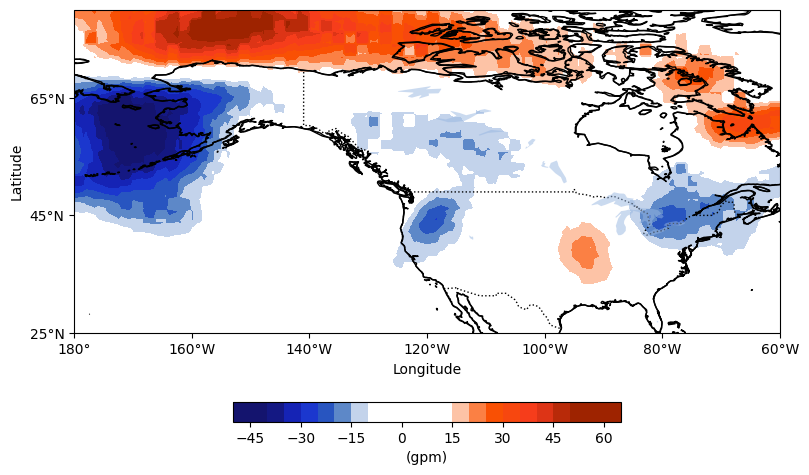

In [390]:
#plot the difference here
lat = np.linspace(25, 80, 110)
lon = np.linspace(-180, -60, 240)
lon_grid, lat_grid = np.meshgrid(lon, lat)

fig = plt.figure(figsize=(10,6))
#proj = ccrs.PlateCarree(central_longitude=-120)
#ax = fig.add_axes([0.1, 0.8, 0.5, 0.3],projection = proj)
ax = plt.axes(projection=ccrs.PlateCarree())

x, y = lon_grid, lat_grid  # Replace with the appropriate transformation method

leftlon, rightlon, lowerlat, upperlat = (-180,-60,25,80)#define map extent

#f2_ax1 = fig.add_axes([0.1, 0.8, 0.5, 0.3],projection = proj)
ax.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())


#setting of colorbar
num_levels = 9
colors = plt.cm.seismic(np.linspace(0, 1, num_levels + 1))

colors

colors[num_levels // 2] = [1, 1, 1, 1] # set to white
colors[num_levels // 2 + 1] = [1, 1, 1, 1]


# Add map 
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='w')


ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.set_xticks(np.arange(leftlon,rightlon+10,20), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(lowerlat,upperlat,20), crs=ccrs.PlateCarree())

lat_formatter = cticker.LatitudeFormatter()
lon_formatter = cticker.LongitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
#contour_levels = np.linspace(0, 20, 11)
# Plot the contour map
#contour = ax.contourf(lon,lat,ds_era.fields[656,2,260:40:-1,720:1200],cmap='jet',levels=20)
contour1 = ax.contourf(x,y,(bad_forecast_3-good_forecast_3)/9.80665,cmap=shifted_cmap,levels=25)
#mark the location of lytto
#red_point_lon = -121.50
#red_point_lat = 50.25
#ax.plot(red_point_lon, red_point_lat, 'r*', markersize=10)
# Add colorbar
#plt.colorbar
vmin=0
vmax=25
cbar = plt.colorbar(contour1, ax=ax, label='(gpm)',orientation='horizontal',shrink=0.5)



# Set plot title and labels
#plt.title('T850_FCN_ERA_member49')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

#plt.savefig('/home/kit/imk-tro/gj5173/anomaly_fcn_era_later /FCN_ERA_49.png')

#656:2021.06.14 00UTC -06.29 00UTC

# Show the plot
#plt.show()

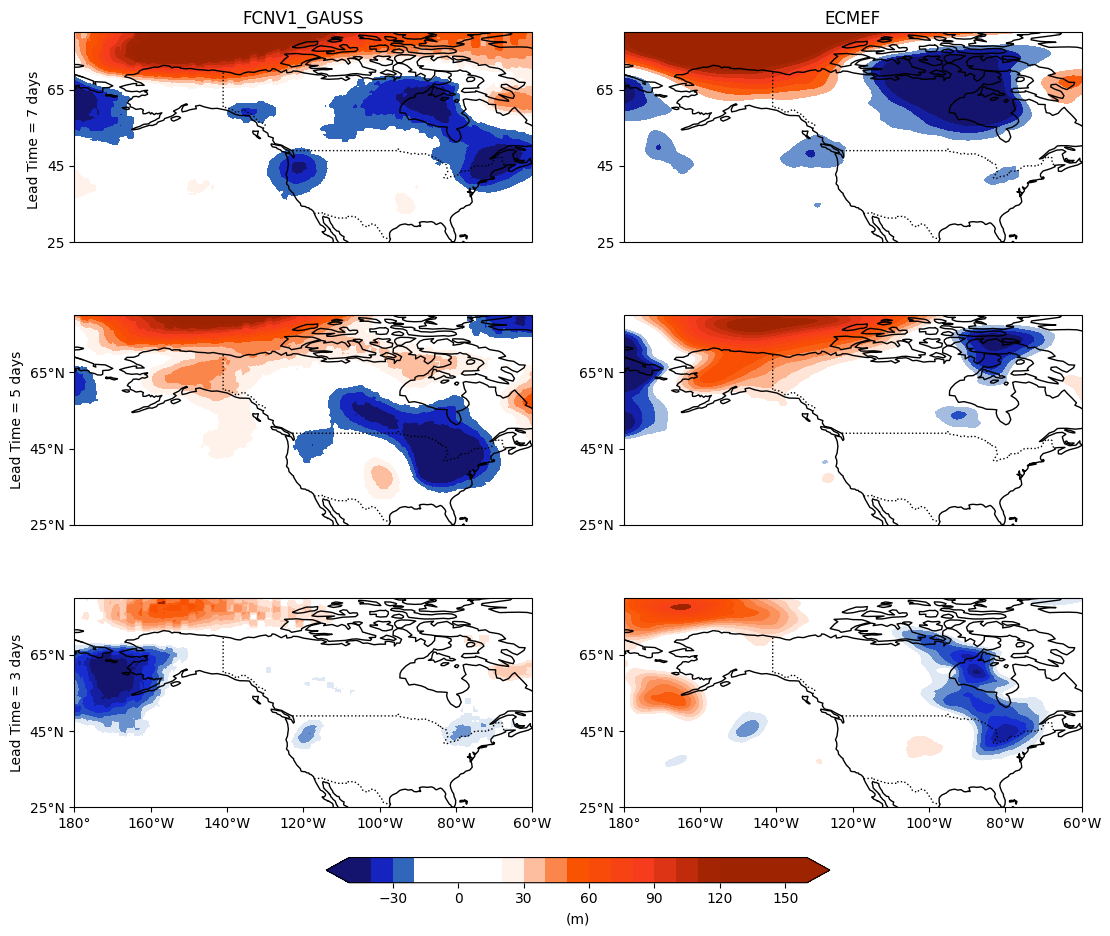

In [440]:
#check if the abnormal sst problem is caused by clor bar settings


#create plots with  DIFFERENCE  9 subplots

# Create a new subplot for additional plots
fig, axs = plt.subplots(3, 2, figsize=(13, 13), subplot_kw={'projection': ccrs.PlateCarree()})



ax1=axs[0,0]
ax2=axs[1,0]
ax3=axs[2,0]
ax4=axs[0,1]
ax5=axs[1,1]
ax6=axs[2,1]
#fig.suptitle('T2m_2021-06-15-18:00UTC', fontsize=12)
#levels = np.linspace(250, 328, 20)
#(ax1,ax2,ax3) = axs

cmap = mcolors.LinearSegmentedColormap.from_list(name='red_white_blue', 
                                                 colors =[(0, 0, 1), 
                                                          (1, 1., 1), 
                                                          (1, 0, 0)],
                                                 N=21,
                                                 )



#vmax = max(difference_ec_14.max(),difference_ec_7.max(), difference_ec_3.max(), difference_fcn_ec_14.max(),difference_fcn_ec_7.max(),difference_fcn_ec_3.max(),difference_fcn_era_14.max(),difference_fcn_era_7.max(),difference_fcn_era_3.max())/9.80665
#vmin = min(difference_ec_14.min(),difference_ec_7.min(), difference_ec_3.min(), difference_fcn_ec_14.min(),difference_fcn_ec_7.min(),difference_fcn_ec_3.min(),difference_fcn_era_14.min(),difference_fcn_era_7.min(),difference_fcn_era_3.min())/9.80665
#vmax = difference_ec_14.max()
#vmin = difference_ec_14.min()
#cmap = plt.get_cmap('coolwarm')
#norm = TwoSlopeNorm(vmin=-500, vcenter=0, vmax=100)
#plot_kwargs = dict(cmap = "coolwarm", vmin=vmin, vmax=vmax,levels = 20)
#norm = mcolors.Normalize(-30,40)
#newcmp = ListedColormap(vals)
#cmap = mcolors.LinearSegmentedColormap.from_list("", ["blue","white","red"])
#cmap = ListedColormap(['red', 'white', 'blue'])
plot_kwargs = dict(cmap=shifted_cmap,levels = 25,vmin = -50,vmax =150)
#cmap=cmap, norm=norm8
leftlon, rightlon, lowerlat, upperlat = (-180,-60,25,80)#define map extent
ax1.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.COASTLINE)
ax1.add_feature(cfeature.BORDERS, linestyle=':')
ax1.add_feature(cfeature.LAND, facecolor='lightgray')
ax1.add_feature(cfeature.OCEAN, facecolor='w')
leftlon, rightlon, lowerlat, upperlat = (-180,-60,25,80)#define map extent
#ax1.set_xticks(np.arange(leftlon,rightlon+10,20), crs=ccrs.PlateCarree(
ax1.set_yticks(np.arange(lowerlat,upperlat,20), crs=ccrs.PlateCarree())
#lat_formatter = cticker.LatitudeFormatter()
lon_formatter = cticker.LongitudeFormatter()
#ax1.xaxis.set_major_formatter(lon_formatter)
#ax1.yaxis.set_major_formatter(lat_formatter)

contour1 = ax1.contourf(x,y,(bad_forecast_7_fcn_era-good_forecast_7_fcn_era)/9.80665,**plot_kwargs,extend = 'both')
#fourcastnet(ECMWF):FIRST:PERTUBED MEMBERS(50-CONTROL FORECAST),SECOND:LEAD TIME,THIRD:VARIABLES
#phony_dim_2: 21phony_dim_0: 51phony_dim_1: 57phony_dim_3: 220phony_dim_4: 480
#cbar = plt.colorbar(contour, ax=ax[0], label='Temperature/K', orientation='horizontal', shrink=0.5)
#ax1.set_title('Forecastnet(ECMWF)',loc='left')
ax1.set_title('FCNV1_GAUSS')
#ax1.set_xlabel('Longitude')
ax1.set_ylabel('Lead Time = 7 days ')


ax2.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
ax2.add_feature(cfeature.COASTLINE)
ax2.add_feature(cfeature.BORDERS, linestyle=':')
ax2.add_feature(cfeature.LAND, facecolor='lightgray')
ax2.add_feature(cfeature.OCEAN, facecolor='w')
leftlon, rightlon, lowerlat, upperlat = (-180,-60,25,80)#define map extent
#ax2.set_xticks(np.arange(leftlon,rightlon+10,20), crs=ccrs.PlateCarree())
ax2.set_yticks(np.arange(lowerlat,upperlat,20), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
lon_formatter = cticker.LongitudeFormatter()
ax2.xaxis.set_major_formatter(lon_formatter)
ax2.yaxis.set_major_formatter(lat_formatter)
ax2.set_ylabel('Lead Time = 5 days')
#ax2.set_title('FCN_GAUSS')
contour2 = ax2.contourf(x,y,(bad_forecast_5_fcn_era-good_forecast_5_fcn_era)/9.80665,**plot_kwargs)

#FRIST DIMENSION:LEAD TIM7
#cbar = plt.colorbar(contour, ax=ax[0], label='Temperature/K', orientation='horizontal', shrink=0.5)
#ax2.set_title('ECMWF',loc='left')
#ax2.set_title('lead time = +42h',loc='right')
#ax2.set_xlabel('Longitude')
#ax2.set_ylabel('Latitude')

# Add more plots in the second subplot (ax[1])
# Example:
# ax[1].plot(x, y, 'r-', label='Plot 2')
# ax[1].set_xlabel('X-axis')
# ax[1].set_ylabel('Y-axis for Plot 2')



ax3.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
ax3.add_feature(cfeature.COASTLINE)
ax3.add_feature(cfeature.BORDERS, linestyle=':')
ax3.add_feature(cfeature.LAND, facecolor='lightgray')
ax3.add_feature(cfeature.OCEAN, facecolor='w')
leftlon, rightlon, lowerlat, upperlat = (-180,-60,25,80)#define map extent
ax3.set_xticks(np.arange(leftlon,rightlon+10,20), crs=ccrs.PlateCarree())
ax3.set_yticks(np.arange(lowerlat,upperlat,20), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
lon_formatter = cticker.LongitudeFormatter()
ax3.xaxis.set_major_formatter(lon_formatter)
ax3.yaxis.set_major_formatter(lat_formatter)
#ax3.set_title('Lead Time = 5days')
#ax3.contour(x,y,bad_forecast_3_fcn_era/9.80665,colors='black',levels=20,linewidths=0.7)
#ax3.contour(x,y,good_forecast_3_fcn_era/9.80665,colors='red',levels=20,linewidths=0.7)
contour3 = ax3.contourf(x,y,(bad_forecast_3_fcn_era-good_forecast_3_fcn_era)/9.80665,**plot_kwargs,extend = 'both')
ax3.set_ylabel('Lead Time = 3 days')


leftlon, rightlon, lowerlat, upperlat = (-180,-60,25,80)#define map extent
ax4.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
ax4.add_feature(cfeature.COASTLINE)
ax4.add_feature(cfeature.BORDERS, linestyle=':')
ax4.add_feature(cfeature.LAND, facecolor='lightgray')
ax4.add_feature(cfeature.OCEAN, facecolor='w')
leftlon, rightlon, lowerlat, upperlat = (-180,-60,25,80)#define map extent
#ax1.set_xticks(np.arange(leftlon,rightlon+10,20), crs=ccrs.PlateCarree(
ax4.set_yticks(np.arange(lowerlat,upperlat,20), crs=ccrs.PlateCarree())
#lat_formatter = cticker.LatitudeFormatter()
lon_formatter = cticker.LongitudeFormatter()
#ax1.xaxis.set_major_formatter(lon_formatter)
#ax1.yaxis.set_major_formatter(lat_formatter)

contour4 = ax4.contourf(x,y,(bad_forecast_7-good_forecast_7)/9.80665,**plot_kwargs,extend = 'both')
#fourcastnet(ECMWF):FIRST:PERTUBED MEMBERS(50-CONTROL FORECAST),SECOND:LEAD TIME,THIRD:VARIABLES
#phony_dim_2: 21phony_dim_0: 51phony_dim_1: 57phony_dim_3: 220phony_dim_4: 480
#cbar = plt.colorbar(contour, ax=ax[0], label='Temperature/K', orientation='horizontal', shrink=0.5)
#ax1.set_title('Forecastnet(ECMWF)',loc='left')
ax4.set_title('ECMEF')
#ax1.set_xlabel('Longitude')
#ax4.set_ylabel('Lead Time = 7 days ')


ax5.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
ax5.add_feature(cfeature.COASTLINE)
ax5.add_feature(cfeature.BORDERS, linestyle=':')
ax5.add_feature(cfeature.LAND, facecolor='lightgray')
ax5.add_feature(cfeature.OCEAN, facecolor='w')
leftlon, rightlon, lowerlat, upperlat = (-180,-60,25,80)#define map extent
#ax2.set_xticks(np.arange(leftlon,rightlon+10,20), crs=ccrs.PlateCarree())
ax5.set_yticks(np.arange(lowerlat,upperlat,20), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
lon_formatter = cticker.LongitudeFormatter()
ax5.xaxis.set_major_formatter(lon_formatter)
ax5.yaxis.set_major_formatter(lat_formatter)
#ax5.set_ylabel('Lead Time = 5 days')
#ax5.set_title('FCN_GAUSS')
contour5 = ax5.contourf(x,y,(bad_forecast_5-good_forecast_5)/9.80665,**plot_kwargs)

#FRIST DIMENSION:LEAD TIM7
#cbar = plt.colorbar(contour, ax=ax[0], label='Temperature/K', orientation='horizontal', shrink=0.5)
#ax2.set_title('ECMWF',loc='left')
#ax2.set_title('lead time = +42h',loc='right')
#ax2.set_xlabel('Longitude')
#ax2.set_ylabel('Latitude')

# Add more plots in the second subplot (ax[1])
# Example:
# ax[1].plot(x, y, 'r-', label='Plot 2')
# ax[1].set_xlabel('X-axis')
# ax[1].set_ylabel('Y-axis for Plot 2')



ax6.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
ax6.add_feature(cfeature.COASTLINE)
ax6.add_feature(cfeature.BORDERS, linestyle=':')
ax6.add_feature(cfeature.LAND, facecolor='lightgray')
ax6.add_feature(cfeature.OCEAN, facecolor='w')
leftlon, rightlon, lowerlat, upperlat = (-180,-60,25,80)#define map extent
ax6.set_xticks(np.arange(leftlon,rightlon+10,20), crs=ccrs.PlateCarree())
ax6.set_yticks(np.arange(lowerlat,upperlat,20), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
lon_formatter = cticker.LongitudeFormatter()
ax6.xaxis.set_major_formatter(lon_formatter)
ax6.yaxis.set_major_formatter(lat_formatter)
#ax3.set_title('Lead Time = 5days')
#ax6.contour(x,y,bad_forecast_3/9.80665,colors='black',levels=20,linewidths=0.7)
#ax6.contour(x,y,good_forecast_3/9.80665,colors='red',levels=20,linewidths=0.7)
contour6 = ax6.contourf(x,y,(bad_forecast_3-good_forecast_3)/9.80665,**plot_kwargs,extend = 'both')
#ax6.set_ylabel('Lead Time = 3 days')

















cbar = plt.colorbar(contour1, ax=axs, orientation='horizontal', cmap=cmap, shrink=0.5,label='(m)',pad = 0.05,extend = 'both')
plt.savefig('/home/kit/imk-tro/gj5173/not_finalized_yet_plots/3*2_bad_good_z500_fcn_era_ec.png', bbox_inches='tight',dpi=200)
#cbar.set_ticklabels(tick_labels)
#plt.colorbar()